### Clustering with a range of k 

In [87]:
import pandas as pd 
from pathlib import Path 
from typing import List
import numpy as np
import matplotlib.pyplot as plt
import datetime
import random
from random import randrange
from datetime import timedelta
#import boto3
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf,month_plot,quarter_plot
import warnings
warnings.filterwarnings('ignore')


In [88]:
data_path = Path.cwd().parent.parent / "data/s3"
#soil_df_path = data_path / "SOPA_data_raw.csv"
soil_df_path = data_path / "simpact_combined_dataset.csv"

soil_df_raw = pd.read_csv(soil_df_path, index_col=0)
soil_df = soil_df_raw


In [89]:
soil_df.head()

fm_station_name    trh_sensor_name  \
datetime                                                           
2022-05-10 00:00:00+00:00  WS400-UMB-426_1221  SENS0002-TRH-SOPA   
2022-05-10 00:00:00+00:00  WS400-UMB-426_1221  SENS0002-TRH-SOPA   
2022-05-10 00:00:00+00:00  WS400-UMB-426_1221  SENS0002-TRH-SOPA   
2022-05-10 00:00:00+00:00  WS400-UMB-426_1221  SENS0002-TRH-SOPA   
2022-05-10 00:00:00+00:00  WS400-UMB-426_1221  SENS0002-TRH-SOPA   

                            sm_station_name  sm_soil_temperature  \
datetime                                                           
2022-05-10 00:00:00+00:00  SENS0053-SM-SOPA                  NaN   
2022-05-10 00:00:00+00:00  SENS0102-SM-SOPA                  NaN   
2022-05-10 00:00:00+00:00  SENS0116-SM-SOPA                  NaN   
2022-05-10 00:00:00+00:00  SENS0145-SM-SOPA                  NaN   
2022-05-10 00:00:00+00:00  SENS0164-SM-SOPA                  NaN   

                           sm_soil_moisture  sm_longitude  sm_latitude  \
datetime                                                                 
2022-05-10 00:00:00+00:00               NaN     151.07959    -33.85013   
2022-05-10 00:00:00+00:00               NaN     151.07977    -33.85033   
2022-05-10 00:00:00+00:00               NaN     151.08002    -33.85030   
2022-05-10 00:00:00+00:00               NaN     151.08032    -33.85010   
2022-05-10 00:00:00+00:00               NaN     151.08016    -33.85006   

                           sm_soil_moisture_interpolated  \
datetime                                                   
2022-05-10 00:00:00+00:00                            NaN   
2022-05-10 00:00:00+00:00                            NaN   
2022-05-10 00:00:00+00:00                            NaN   
2022-05-10 00:00:00+00:00                            NaN   
2022-05-10 00:00:00+00:00                            NaN   

                           sm_soil_moisture_is_interpolated  \
datetime                                                      
2022-05-10 00:00:00+00:00                             False   
2022-05-10 00:00:00+00:00                             False   
2022-05-10 00:00:00+00:00                             False   
2022-05-10 00:00:00+00:00                             False   
2022-05-10 00:00:00+00:00                             False   

                           sm_soil_temperature_interpolated  ...  \
datetime                                                     ...   
2022-05-10 00:00:00+00:00                               NaN  ...   
2022-05-10 00:00:00+00:00                               NaN  ...   
2022-05-10 00:00:00+00:00                               NaN  ...   
2022-05-10 00:00:00+00:00                               NaN  ...   
2022-05-10 00:00:00+00:00                               NaN  ...   

                           fm_relative_humidity  fm_temperature  \
datetime                                                          
2022-05-10 00:00:00+00:00                  89.9          18.175   
2022-05-10 00:00:00+00:00                  89.9          18.175   
2022-05-10 00:00:00+00:00                  89.9          18.175   
2022-05-10 00:00:00+00:00                  89.9          18.175   
2022-05-10 00:00:00+00:00                  89.9          18.175   

                           fm_precipitation_intensity  \
datetime                                                
2022-05-10 00:00:00+00:00                         0.0   
2022-05-10 00:00:00+00:00                         0.0   
2022-05-10 00:00:00+00:00                         0.0   
2022-05-10 00:00:00+00:00                         0.0   
2022-05-10 00:00:00+00:00                         0.0   

                           bom_forecasted_temperature  \
datetime                                                
2022-05-10 00:00:00+00:00                         NaN   
2022-05-10 00:00:00+00:00                         NaN   
2022-05-10 00:00:00+00:00                         NaN   
2022-05-10 00:00:00+00:00                         NaN   
2022-

In [90]:
def remove_microseconds(datetime_str):
    if '.' in datetime_str:
        dot_index = datetime_str.index('.')
        plus_index = datetime_str.index('+')
        return datetime_str[:dot_index] + datetime_str[plus_index:]
    else:
        return datetime_str
    


In [91]:
#soil_df['datetime'] = soil_df['datetime'].apply(lambda x: x[:-13] + x[-6:])


#soil_df['datetime'] = soil_df['datetime'].apply(remove_microseconds)
soil_df.head()

fm_station_name    trh_sensor_name  \
datetime                                                           
2022-05-10 00:00:00+00:00  WS400-UMB-426_1221  SENS0002-TRH-SOPA   
2022-05-10 00:00:00+00:00  WS400-UMB-426_1221  SENS0002-TRH-SOPA   
2022-05-10 00:00:00+00:00  WS400-UMB-426_1221  SENS0002-TRH-SOPA   
2022-05-10 00:00:00+00:00  WS400-UMB-426_1221  SENS0002-TRH-SOPA   
2022-05-10 00:00:00+00:00  WS400-UMB-426_1221  SENS0002-TRH-SOPA   

                            sm_station_name  sm_soil_temperature  \
datetime                                                           
2022-05-10 00:00:00+00:00  SENS0053-SM-SOPA                  NaN   
2022-05-10 00:00:00+00:00  SENS0102-SM-SOPA                  NaN   
2022-05-10 00:00:00+00:00  SENS0116-SM-SOPA                  NaN   
2022-05-10 00:00:00+00:00  SENS0145-SM-SOPA                  NaN   
2022-05-10 00:00:00+00:00  SENS0164-SM-SOPA                  NaN   

                           sm_soil_moisture  sm_longitude  sm_latitude  \
datetime                                                                 
2022-05-10 00:00:00+00:00               NaN     151.07959    -33.85013   
2022-05-10 00:00:00+00:00               NaN     151.07977    -33.85033   
2022-05-10 00:00:00+00:00               NaN     151.08002    -33.85030   
2022-05-10 00:00:00+00:00               NaN     151.08032    -33.85010   
2022-05-10 00:00:00+00:00               NaN     151.08016    -33.85006   

                           sm_soil_moisture_interpolated  \
datetime                                                   
2022-05-10 00:00:00+00:00                            NaN   
2022-05-10 00:00:00+00:00                            NaN   
2022-05-10 00:00:00+00:00                            NaN   
2022-05-10 00:00:00+00:00                            NaN   
2022-05-10 00:00:00+00:00                            NaN   

                           sm_soil_moisture_is_interpolated  \
datetime                                                      
2022-05-10 00:00:00+00:00                             False   
2022-05-10 00:00:00+00:00                             False   
2022-05-10 00:00:00+00:00                             False   
2022-05-10 00:00:00+00:00                             False   
2022-05-10 00:00:00+00:00                             False   

                           sm_soil_temperature_interpolated  ...  \
datetime                                                     ...   
2022-05-10 00:00:00+00:00                               NaN  ...   
2022-05-10 00:00:00+00:00                               NaN  ...   
2022-05-10 00:00:00+00:00                               NaN  ...   
2022-05-10 00:00:00+00:00                               NaN  ...   
2022-05-10 00:00:00+00:00                               NaN  ...   

                           fm_relative_humidity  fm_temperature  \
datetime                                                          
2022-05-10 00:00:00+00:00                  89.9          18.175   
2022-05-10 00:00:00+00:00                  89.9          18.175   
2022-05-10 00:00:00+00:00                  89.9          18.175   
2022-05-10 00:00:00+00:00                  89.9          18.175   
2022-05-10 00:00:00+00:00                  89.9          18.175   

                           fm_precipitation_intensity  \
datetime                                                
2022-05-10 00:00:00+00:00                         0.0   
2022-05-10 00:00:00+00:00                         0.0   
2022-05-10 00:00:00+00:00                         0.0   
2022-05-10 00:00:00+00:00                         0.0   
2022-05-10 00:00:00+00:00                         0.0   

                           bom_forecasted_temperature  \
datetime                                                
2022-05-10 00:00:00+00:00                         NaN   
2022-05-10 00:00:00+00:00                         NaN   
2022-05-10 00:00:00+00:00                         NaN   
2022-05-10 00:00:00+00:00                         NaN   
2022-

In [92]:
soil_df.columns

Index(['fm_station_name', 'trh_sensor_name', 'sm_station_name',
       'sm_soil_temperature', 'sm_soil_moisture', 'sm_longitude',
       'sm_latitude', 'sm_soil_moisture_interpolated',
       'sm_soil_moisture_is_interpolated', 'sm_soil_temperature_interpolated',
       'sm_soil_temperature_is_interpolated', 'trh_humidity',
       'trh_temperature', 'fm_act_specific_enthalpy',
       'fm_act_wet_bulb_temperature_c', 'fm_dew_point_temperature',
       'fm_precipitation_quantity', 'fm_relative_humidity', 'fm_temperature',
       'fm_precipitation_intensity', 'bom_forecasted_temperature',
       'bom_forecasted_relative_humidity',
       'bom_forecasted_precipitation_quantitiy', 'bom_actual_temperature',
       'bom_actual_relative_humidity', 'bom_actual_precipitation_cumulative',
       'bom_actual_precipitation_hourly'],
      dtype='object')

In [93]:
df_back=df_comb

In [94]:
import pandas as pd
import numpy as np
from tslearn.clustering import TimeSeriesKMeans
from tslearn.clustering import TimeSeriesKMeans, KShape
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.metrics import dtw
import matplotlib.pyplot as plt

def cluster_sensors(df, method, sensor_name_col, sensor_values_col, n_clusters):
    # Extract time series data
    time_series_data = df.pivot_table(index=df.index, columns=sensor_name_col, values=sensor_values_col)
    
    # Fill NaN values with mean
    time_series_data = time_series_data.fillna(time_series_data.mean())
    
    # Scale the time series data
    scaler = TimeSeriesScalerMeanVariance()
    scaled_data = scaler.fit_transform(time_series_data.values)
    
    # Perform clustering
    if method == 'k-shape':
        model = KShape(n_clusters=n_clusters, verbose=True, random_state=0)
        labels = model.fit_predict(scaled_data)
    elif method == 'dtw':
        model = TimeSeriesKMeans(n_clusters=n_clusters, metric="dtw", verbose=True, random_state=0)
        labels = model.fit_predict(scaled_data)
    else:
        raise ValueError("Invalid clustering method. Choose 'k-shape' or 'dtw'.")
    
    return labels

In [95]:
df

fm_station_name    trh_sensor_name  \
datetime                                                           
2022-06-01 00:00:00+00:00  WS400-UMB-426_1221  SENS0002-TRH-SOPA   
2022-06-01 00:00:00+00:00  WS400-UMB-426_1221  SENS0002-TRH-SOPA   
2022-06-01 00:00:00+00:00  WS400-UMB-426_1221  SENS0002-TRH-SOPA   
2022-06-01 00:00:00+00:00  WS400-UMB-426_1221  SENS0002-TRH-SOPA   
2022-06-01 00:00:00+00:00  WS400-UMB-426_1221  SENS0002-TRH-SOPA   
...                                       ...                ...   
2022-06-30 23:00:00+00:00  WS600-UMB-456_0222  SENS0054-TRH-SOPA   
2022-06-30 23:00:00+00:00  WS600-UMB-456_0222  SENS0054-TRH-SOPA   
2022-06-30 23:00:00+00:00  WS600-UMB-456_0222  SENS0055-TRH-SOPA   
2022-06-30 23:00:00+00:00  WS600-UMB-456_0222  SENS0055-TRH-SOPA   
2022-06-30 23:00:00+00:00  WS600-UMB-456_0222  SENS0055-TRH-SOPA   

                            sm_station_name  sm_soil_temperature  \
datetime                                                           
2022-06-01 00:00:00+00:00  SENS0053-SM-SOPA                  NaN   
2022-06-01 00:00:00+00:00  SENS0102-SM-SOPA            14.700000   
2022-06-01 00:00:00+00:00  SENS0116-SM-SOPA            14.042500   
2022-06-01 00:00:00+00:00  SENS0145-SM-SOPA            13.300000   
2022-06-01 00:00:00+00:00  SENS0164-SM-SOPA                  NaN   
...                                     ...                  ...   
2022-06-30 23:00:00+00:00  SENS0082-SM-SOPA            13.620000   
2022-06-30 23:00:00+00:00  SENS0088-SM-SOPA            11.736667   
2022-06-30 23:00:00+00:00  SENS0142-SM-SOPA            14.647500   
2022-06-30 23:00:00+00:00  SENS0175-SM-SOPA            14.252500   
2022-06-30 23:00:00+00:00  SENS0187-SM-SOPA            15.390000   

                           sm_soil_moisture  sm_longitude  sm_latitude  \
datetime                                                                 
2022-06-01 00:00:00+00:00               NaN     151.07959    -33.85013   
2022-06-01 00:00:00+00:00         38.679149     151.07977    -33.85033   
2022-06-01 00:00:00+00:00         19.044787     151.08002    -33.85030   
2022-06-01 00:00:00+00:00         35.208234     151.08032    -33.85010   
2022-06-01 00:00:00+00:00               NaN     151.08016    -33.85006   
...                                     ...           ...          ...   
2022-06-30 23:00:00+00:00         15.632382     151.07761    -33.85037   
2022-06-30 23:00:00+00:00         31.324127     151.07757    -33.85015   
2022-06-30 23:00:00+00:00         25.899141     151.07822    -33.84960   
2022-06-30 23:00:00+00:00         33.596311     151.07841    -33.84972   
2022-06-30 23:00:00+00:00         45.610572     151.07752    -33.84993   

                           sm_soil_moisture_interpolated  \
datetime                                                   
2022-06-01 00:00:00+00:00                      44.366747   
2022-06-01 00:00:00+00:00                      38.679149   
2022-06-01 00:00:00+00:00                      19.044787   
2022-06-01 00:00:00+00:00                      35.208234   
2022-06-01 00:00:00+00:00                            NaN   
...                                                  ...   
2022-06-30 23:00:00+00:00                      15.632382   
2022-06-30 23:00:00+00:00                      31.324127   
2022-06-30 23:00:00+00:00                      25.899141   
2022-06-30 23:00:00+00:00                      33.596311   
2022-06-30 23:00:00+00:00                      45.610572   

                           sm_soil_moisture_is_interpolated  \
datetime                                                      
2022-06-01 00:00:00+00:00                              True   
2022-06-01 00:00:00+00:00                             False   
2022-06-01 00:00:00+00:00                             False   
2022-06-01 00:00:00+00:00                             False   
2022-06-01 00:00:00+00:00                             False   
...                                                     ...   
2022-06-30 2

In [96]:
time_series_data = df_sliced.pivot_table(index=df_sliced.index, columns='sm_station_name', values='sm_soil_moisture')
time_series_data = time_series_data.fillna(time_series_data.mean())

time_series_data.values.T

array([[37.15599525, 37.15599525, 40.54434026, ..., 41.69345054,
        41.65877027, 41.58963998],
       [22.86940913, 22.74034995, 22.74034995, ..., 10.38664462,
        10.38406083, 10.37372537],
       [12.96563644, 12.66138519, 12.73690526, ..., 13.8228774 ,
        13.7758282 , 13.85640132],
       ...,
       [33.59631101, 33.59631101, 33.59631101, ..., 37.54682684,
        37.51564708, 37.54683795],
       [16.74309549, 16.74309549, 16.74309549, ..., 16.79061116,
        16.67797259, 16.67798198],
       [27.12219581, 27.12219581, 27.12219581, ..., 27.12219581,
        27.12219581, 27.12219581]])

In [266]:
data_path = Path.cwd().parent.parent / "data"
#dfd=pd.read_csv(data_path / 'SOPA-data-TS-daily-clean-fill-2023-04-01-to-2023-09-30.csv')
dfd=pd.read_csv(data_path / 'SOPA-data-TS-daily-clean-2023-04-and-2023-09.csv')
#dfd.reset_index(inplace=True)


In [267]:
dfd.head()

datetime  SENS0002-SM-SOPA  SENS0004-SM-SOPA  SENS0005-SM-SOPA  \
0  2023-04-01         25.356379         28.545162         22.816866   
1  2023-04-02         29.634893         28.900930         24.634101   
2  2023-04-03         28.762701         28.786394         23.589358   
3  2023-04-04         27.962216         28.783532         23.202230   
4  2023-04-05         27.727547         28.621299         23.153972   

   SENS0008-SM-SOPA  SENS0009-SM-SOPA  SENS0012-SM-SOPA  SENS0014-SM-SOPA  \
0         19.682013         17.785000         24.117156            22.400   
1         19.045000         14.230792         28.905930            21.085   
2         18.302206         12.747055         26.330419            21.350   
3         17.784784         12.869348         25.341918            21.570   
4         17.156868         12.912431         24.912046            21.620   

   SENS0015-SM-SOPA  SENS0016-SM-SOPA  ...  SENS0243-SM-SOPA  \
0             19.68         21.110000  ...         21.825000   
1             19.12         25.647448  ...         31.982510   
2             19.41         22.941660  ...         32.408852   
3             19.51         22.162428  ...         28.166761   
4             19.55         21.697548  ...         27.227473   

   SENS0244-SM-SOPA  SENS0245-SM-SOPA  SENS0246-SM-SOPA  SENS0247-SM-SOPA  \
0         19.790000         26.183657         24.042290         24.173972   
1         20.111764         28.592454         25.787532         25.253485   
2         20.056381         28.356119         25.491477         24.955801   
3         19.924310         27.941501         25.000297         24.831298   
4         19.890000         27.304581         24.415071         24.497734   

   SENS0248-SM-SOPA  SENS0249-SM-SOPA  SENS0250-SM-SOPA  SENS0251-SM-SOPA  \
0         26.256985         18.865000         25.107521         16.163946   
1         27.578442         19.742329         28.839098         16.916010   
2         27.458874         19.540744         29.345731         15.975964   
3         27.066501         19.407652         27.661609         15.957424   
4         26.603471         18.902258         26.795170         15.769835   

   SENS0253-SM-SOPA  
0         32.487510  
1         32.938358  
2         33.006321  
3         33.146498  
4         33.203760  

[5 rows x 123 columns]

In [268]:
dfd = dfd.drop(columns=['datetime'])
dfd = dfd.ffill(axis=0)
#dfd.reset_index(inplace=True)

In [269]:
dfd.head()

SENS0002-SM-SOPA  SENS0004-SM-SOPA  SENS0005-SM-SOPA  SENS0008-SM-SOPA  \
0         25.356379         28.545162         22.816866         19.682013   
1         29.634893         28.900930         24.634101         19.045000   
2         28.762701         28.786394         23.589358         18.302206   
3         27.962216         28.783532         23.202230         17.784784   
4         27.727547         28.621299         23.153972         17.156868   

   SENS0009-SM-SOPA  SENS0012-SM-SOPA  SENS0014-SM-SOPA  SENS0015-SM-SOPA  \
0         17.785000         24.117156            22.400             19.68   
1         14.230792         28.905930            21.085             19.12   
2         12.747055         26.330419            21.350             19.41   
3         12.869348         25.341918            21.570             19.51   
4         12.912431         24.912046            21.620             19.55   

   SENS0016-SM-SOPA  SENS0017-SM-SOPA  ...  SENS0243-SM-SOPA  \
0         21.110000         19.485000  ...         21.825000   
1         25.647448         20.837748  ...         31.982510   
2         22.941660         20.313676  ...         32.408852   
3         22.162428         20.246356  ...         28.166761   
4         21.697548         19.908695  ...         27.227473   

   SENS0244-SM-SOPA  SENS0245-SM-SOPA  SENS0246-SM-SOPA  SENS0247-SM-SOPA  \
0         19.790000         26.183657         24.042290         24.173972   
1         20.111764         28.592454         25.787532         25.253485   
2         20.056381         28.356119         25.491477         24.955801   
3         19.924310         27.941501         25.000297         24.831298   
4         19.890000         27.304581         24.415071         24.497734   

   SENS0248-SM-SOPA  SENS0249-SM-SOPA  SENS0250-SM-SOPA  SENS0251-SM-SOPA  \
0         26.256985         18.865000         25.107521         16.163946   
1         27.578442         19.742329         28.839098         16.916010   
2         27.458874         19.540744         29.345731         15.975964   
3         27.066501         19.407652         27.661609         15.957424   
4         26.603471         18.902258         26.795170         15.769835   

   SENS0253-SM-SOPA  
0         32.487510  
1         32.938358  
2         33.006321  
3         33.146498  
4         33.203760  

[5 rows x 122 columns]

In [307]:
sensor_names = list(dfd.columns)
sensor_names

['SENS0002-SM-SOPA',
 'SENS0004-SM-SOPA',
 'SENS0005-SM-SOPA',
 'SENS0008-SM-SOPA',
 'SENS0009-SM-SOPA',
 'SENS0012-SM-SOPA',
 'SENS0014-SM-SOPA',
 'SENS0015-SM-SOPA',
 'SENS0016-SM-SOPA',
 'SENS0017-SM-SOPA',
 'SENS0018-SM-SOPA',
 'SENS0019-SM-SOPA',
 'SENS0020-SM-SOPA',
 'SENS0021-SM-SOPA',
 'SENS0022-SM-SOPA',
 'SENS0023-SM-SOPA',
 'SENS0024-SM-SOPA',
 'SENS0025-SM-SOPA',
 'SENS0027-SM-SOPA',
 'SENS0028-SM-SOPA',
 'SENS0030-SM-SOPA',
 'SENS0034-SM-SOPA',
 'SENS0039-SM-SOPA',
 'SENS0042-SM-SOPA',
 'SENS0049-SM-SOPA',
 'SENS0051-SM-SOPA',
 'SENS0053-SM-SOPA',
 'SENS0055-SM-SOPA',
 'SENS0059-SM-SOPA',
 'SENS0061-SM-SOPA',
 'SENS0068-SM-SOPA',
 'SENS0071-SM-SOPA',
 'SENS0072-SM-SOPA',
 'SENS0073-SM-SOPA',
 'SENS0074-SM-SOPA',
 'SENS0075-SM-SOPA',
 'SENS0076-SM-SOPA',
 'SENS0087-SM-SOPA',
 'SENS0091-SM-SOPA',
 'SENS0093-SM-SOPA',
 'SENS0094-SM-SOPA',
 'SENS0095-SM-SOPA',
 'SENS0096-SM-SOPA',
 'SENS0098-SM-SOPA',
 'SENS0099-SM-SOPA',
 'SENS0100-SM-SOPA',
 'SENS0103-SM-SOPA',
 'SENS0107-SM

In [270]:
sensor_data=dfd.values.T

In [271]:
sensor_data

array([[25.35637851, 29.63489346, 28.76270077, ..., 23.71365748,
        23.54358179, 23.58164987],
       [28.54516169, 28.90092976, 28.78639408, ..., 27.30487882,
        27.24945661, 26.88114291],
       [22.81686633, 24.63410148, 23.58935778, ..., 27.69579267,
        27.43721613, 27.34867365],
       ...,
       [25.10752128, 28.83909817, 29.34573082, ..., 26.59642963,
        26.1808063 , 25.69794528],
       [16.16394596, 16.91600956, 15.97596362, ..., 11.5826591 ,
        11.5039588 , 11.71027122],
       [32.48751024, 32.9383578 , 33.00632115, ..., 32.11027768,
        19.34      , 32.98962419]])

Running k-shape with  12
Running k-shape with  13
Running k-shape with  14
Running k-shape with  15
Running k-shape with  16
Running k-shape with  17
Running k-shape with  18
Running k-shape with  19
Running k-shape with  20
Running k-shape with  21
Running k-shape with  22
Running k-shape with  23
Running k-shape with  24
Running k-shape with  25
Running k-shape with  26
Running k-shape with  27
Running k-shape with  28
Running k-shape with  29
Running k-shape with  30
Running k-shape with  31
Running k-shape with  32
Running k-shape with  33
Running k-shape with  34
Running k-shape with  35
Running k-shape with  36
Running k-shape with  37
Running k-shape with  38
Running k-shape with  39
Running k-shape with  40


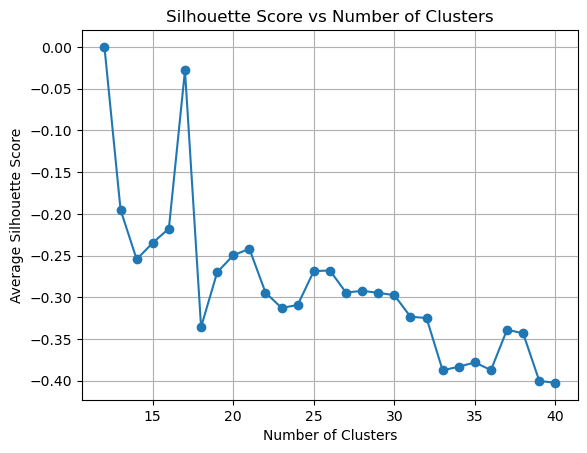

In [294]:
import numpy as np
import matplotlib.pyplot as plt
from tslearn.clustering import KShape
from sklearn.metrics import silhouette_score
# Define a range of cluster numbers to try
n_clusters_range = range(12, 41)

# Initialize lists to store silhouette scores
silhouette_scores = []

# Iterate over different values of n_clusters
for n_clusters in n_clusters_range:
    print("Running k-shape with ",n_clusters)
    # Fit KShape clustering algorithm
    kshape = KShape(n_clusters=n_clusters, verbose=False, random_state=42)
    kshape.fit(sensor_data)
    
    # Get cluster labels
    cluster_labels = kshape.labels_
    if np.max(cluster_labels) != np.min(cluster_labels):

    # Compute silhouette score
        silhouette_avg = silhouette_score(sensor_data, cluster_labels)
    else:
        silhouette_avg = 0
    
    # Append silhouette score to list
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores vs number of clusters
plt.plot(n_clusters_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.grid(True)
plt.show()

2

Running k-means with  12
Running k-means with  13
Running k-means with  14
Running k-means with  15
Running k-means with  16
Running k-means with  17
Running k-means with  18
Running k-means with  19
Running k-means with  20
Running k-means with  21
Running k-means with  22
Running k-means with  23
Running k-means with  24
Running k-means with  25
Running k-means with  26
Running k-means with  27
Running k-means with  28
Running k-means with  29
Running k-means with  30
Running k-means with  31
Running k-means with  32
Running k-means with  33
Running k-means with  34
Running k-means with  35
Running k-means with  36
Running k-means with  37
Running k-means with  38
Running k-means with  39
Running k-means with  40


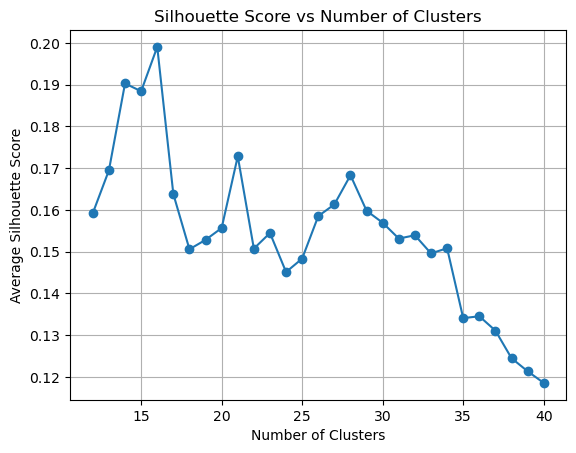

In [295]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tslearn.clustering import TimeSeriesKMeans
from sklearn.metrics import silhouette_score

# Assuming dfd is your DataFrame containing sensor data

# Step 1: Preprocess the data
# Impute missing values with forward fill
# dfd = dfd.ffill(axis=0)

# Transpose to have sensors as rows and time steps as columns
#sensor_data = dfd.values.T  # Transpose to have sensors as rows and time steps as columns

# Define a range of cluster numbers to try
n_clusters_range = range(12, 41)

# Initialize lists to store silhouette scores
silhouette_scores_d = []

# Iterate over different values of n_clusters
for n_clusters in n_clusters_range:
    print("Running k-means with ",n_clusters)

    # Fit DTW K-means clustering algorithm
    dtw_kmeans = TimeSeriesKMeans(n_clusters=n_clusters, metric="dtw", verbose=False, random_state=42)
    dtw_kmeans.fit(sensor_data)
    
    # Get cluster labels
    cluster_labels = dtw_kmeans.labels_
    
    # Compute silhouette score
    silhouette_avg = silhouette_score(sensor_data, cluster_labels)
    
    # Append silhouette score to list
    silhouette_scores_d.append(silhouette_avg)

# Plot silhouette scores vs number of clusters
plt.plot(n_clusters_range, silhouette_scores_d, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.grid(True)
plt.show()

In [296]:
silhouette_df = pd.DataFrame({
    'K': n_clusters_range,
    'sscore_kshape': silhouette_scores,
    'sscore_dtw': silhouette_scores_d
})

In [153]:
silhouette_df.to_csv(data_path /'silhouette_scores_2023.csv', index=False)


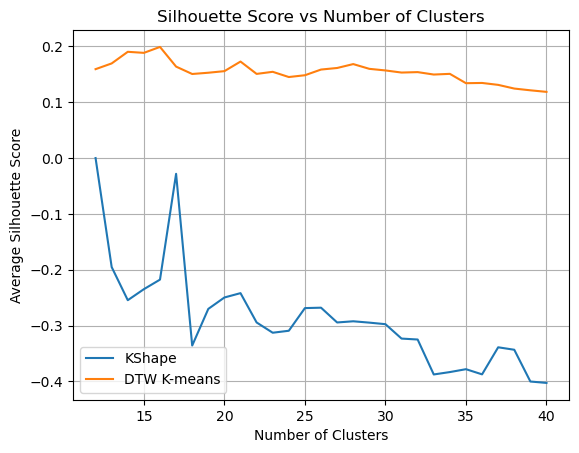

In [297]:
import matplotlib.pyplot as plt

# Assuming silhouette_df is defined as in your question

# Plot silhouette scores vs number of clusters
plt.plot(silhouette_df['K'], silhouette_df['sscore_kshape'], label='KShape')
plt.plot(silhouette_df['K'], silhouette_df['sscore_dtw'], label='DTW K-means')

plt.xlabel('Number of Clusters')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.legend()
plt.grid(True)
plt.show()


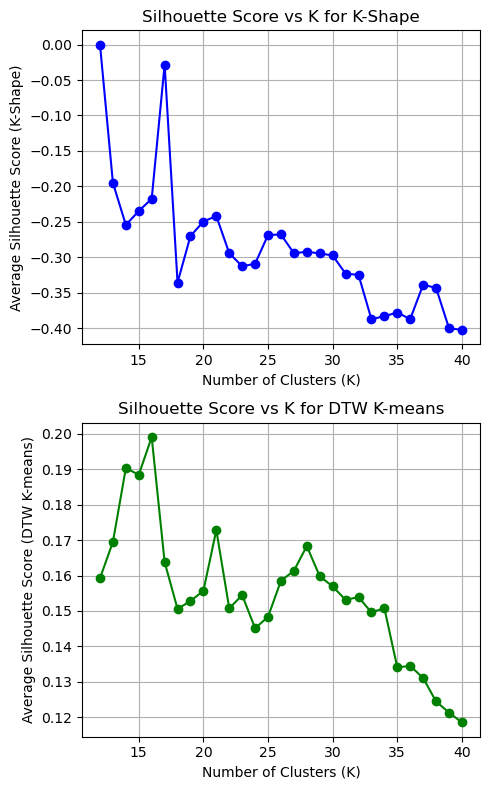

In [298]:
import matplotlib.pyplot as plt

# Create a figure and two subplots with half width
fig, axs = plt.subplots(2, 1, figsize=(5, 8))

# Plot silhouette scores vs number of clusters for KShape
axs[0].plot(silhouette_df['K'], silhouette_df['sscore_kshape'],marker='o',  label='KShape', color='blue')
axs[0].set_xlabel('Number of Clusters (K)')
axs[0].set_ylabel('Average Silhouette Score (K-Shape)')
axs[0].set_title('Silhouette Score vs K for K-Shape')
#axs[0].legend()
axs[0].grid(True)

# Plot silhouette scores vs number of clusters for DTW K-means
axs[1].plot(silhouette_df['K'], silhouette_df['sscore_dtw'], marker='o', label='DTW K-means', color='green')
axs[1].set_xlabel('Number of Clusters (K)')
axs[1].set_ylabel('Average Silhouette Score (DTW K-means)')
axs[1].set_title('Silhouette Score vs K for DTW K-means')
#axs[1].legend()
axs[1].grid(True)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [161]:
dfd.tail()

index  SENS0002-SM-SOPA  SENS0004-SM-SOPA  SENS0005-SM-SOPA  \
178    178         20.444340         23.559410         25.821501   
179    179         20.911135         26.572076         27.007118   
180    180         23.713657         27.304879         27.695793   
181    181         23.543582         27.249457         27.437216   
182    182         23.581650         26.881143         27.348674   

     SENS0008-SM-SOPA  SENS0009-SM-SOPA  SENS0012-SM-SOPA  SENS0014-SM-SOPA  \
178         18.041220         10.418458         20.066576         18.200000   
179         19.141699         12.758753         20.324870         18.710000   
180         20.678456         11.498156         23.217046         10.342167   
181         20.440730         11.251232         23.415914         10.365405   
182         20.161544         11.561232         23.452669         10.606603   

     SENS0015-SM-SOPA  SENS0016-SM-SOPA  ...  SENS0243-SM-SOPA  \
178             16.91         13.103986  ...         14.695259   
179             17.47         17.009681  ...         17.275000   
180             17.47         18.273043  ...         18.034110   
181             17.47         17.960000  ...         18.508809   
182             18.03         17.717284  ...         18.135000   

     SENS0244-SM-SOPA  SENS0245-SM-SOPA  SENS0246-SM-SOPA  SENS0247-SM-SOPA  \
178         16.680000         19.301220         20.871699         25.756548   
179         16.783618         19.800350         21.369071         27.533084   
180         16.946846         21.813835         25.078587         28.857824   
181         17.051018         22.483644         24.719920         29.111536   
182         17.144596         22.106160         24.165664         28.880137   

     SENS0248-SM-SOPA  SENS0249-SM-SOPA  SENS0250-SM-SOPA  SENS0251-SM-SOPA  \
178         18.075503         14.338072         23.157802         13.828345   
179         18.295157         14.460643         24.682944         11.453645   
180         18.662538         14.253266         26.596430         11.582659   
181         18.683043         14.510303         26.180806         11.503959   
182         18.812335         14.838507         25.697945         11.710271   

     SENS0253-SM-SOPA  
178         26.711702  
179         27.291394  
180         32.110278  
181         19.340000  
182         32.989624  

[5 rows x 123 columns]

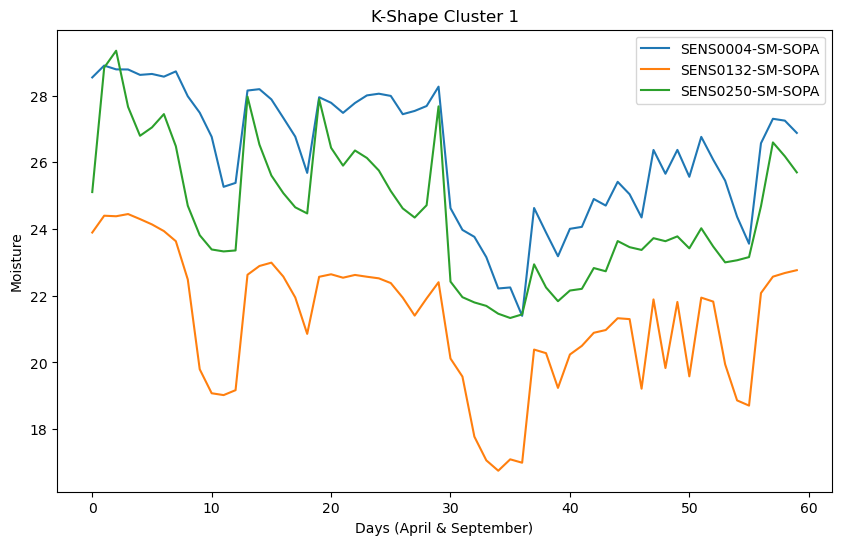

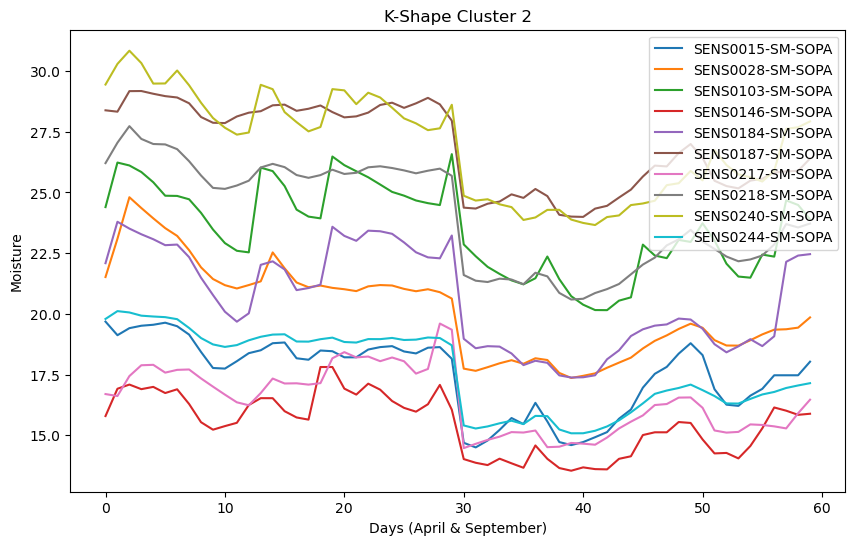

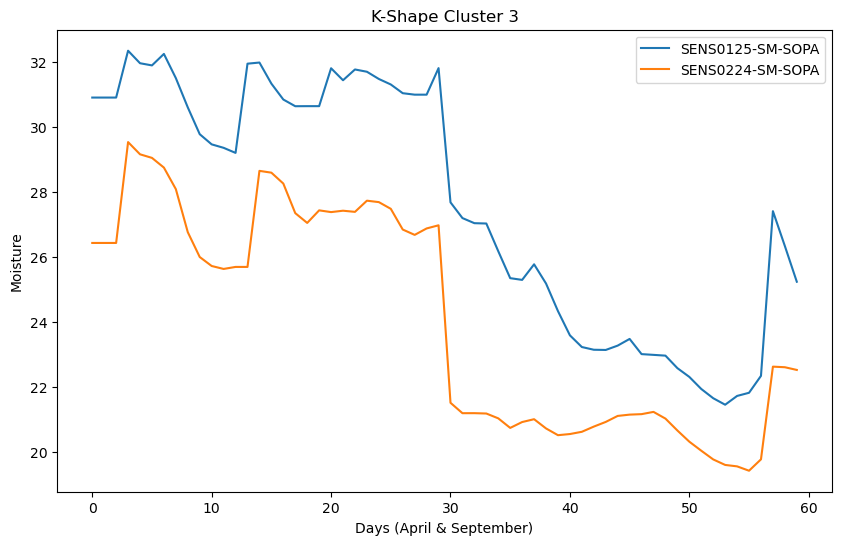

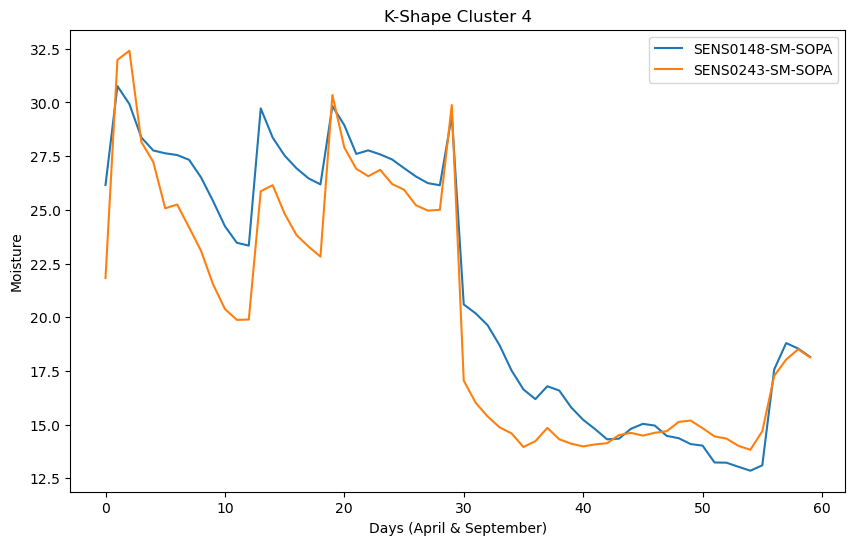

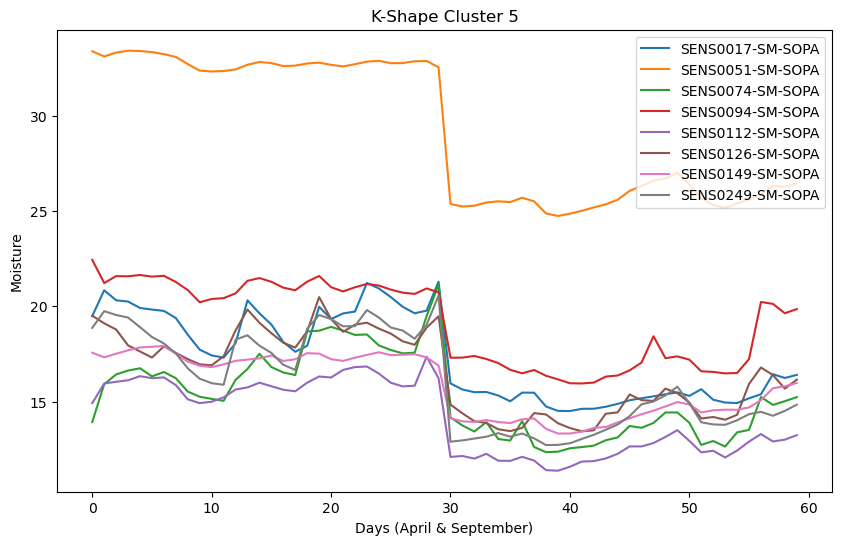

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


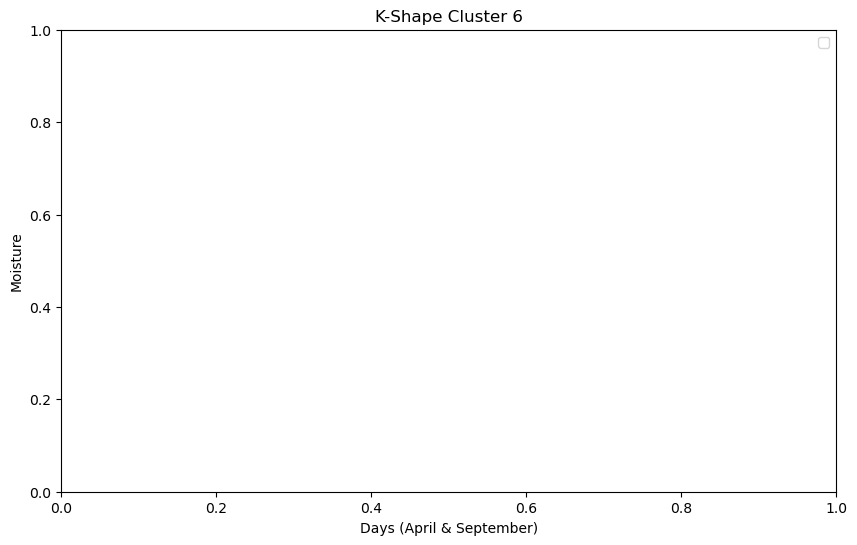

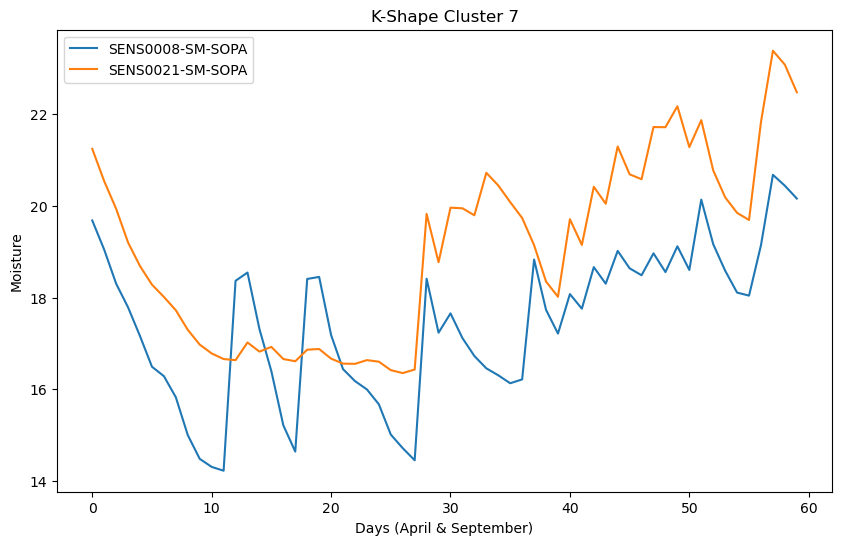

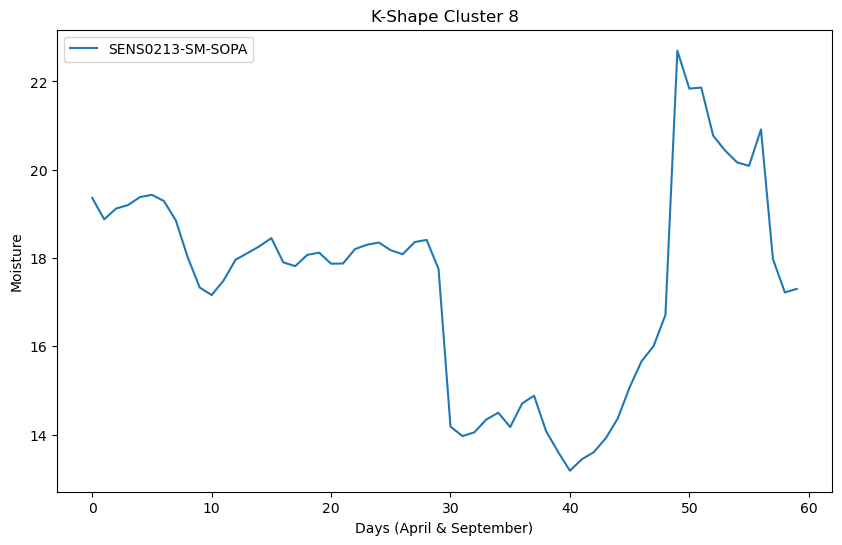

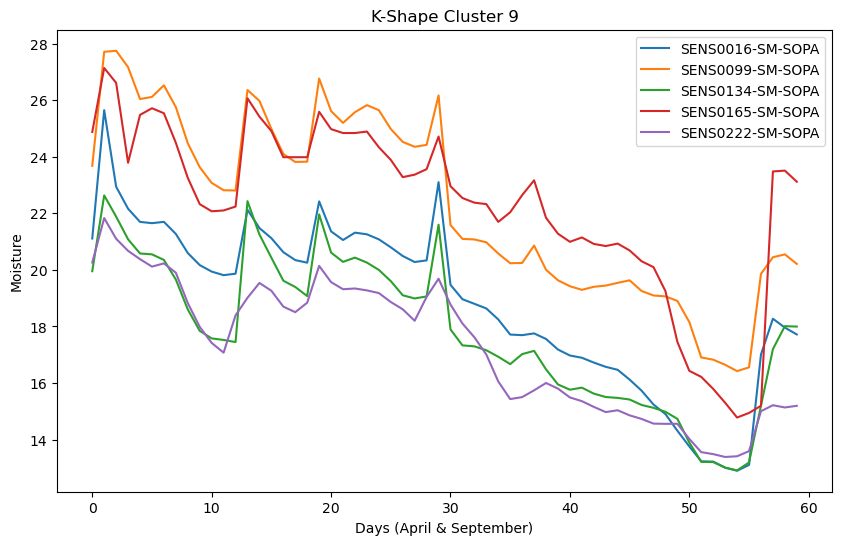

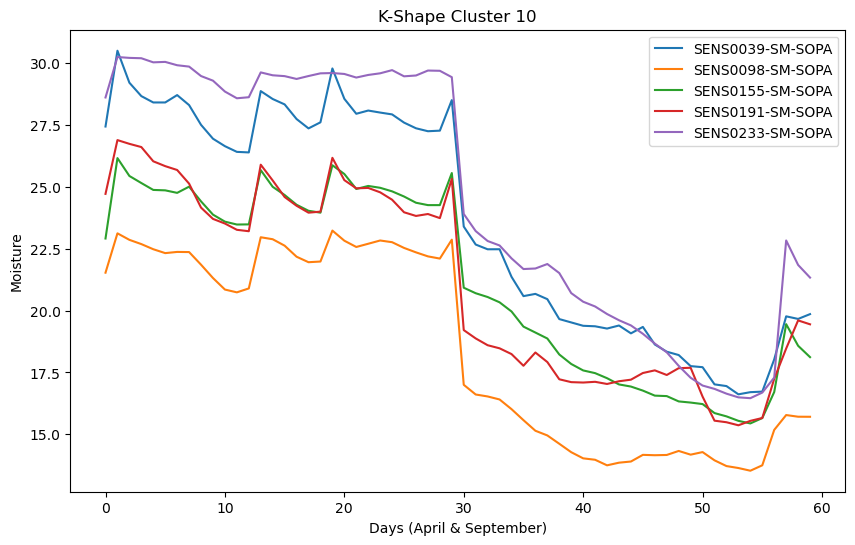

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


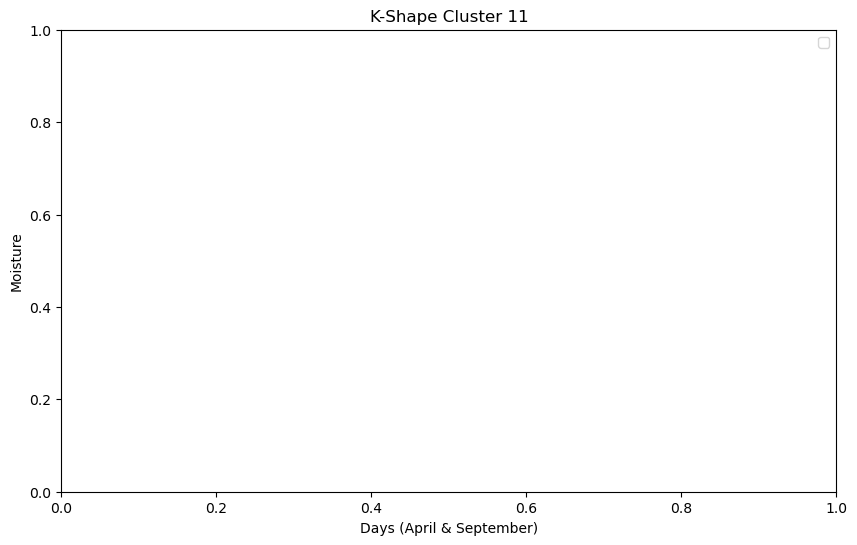

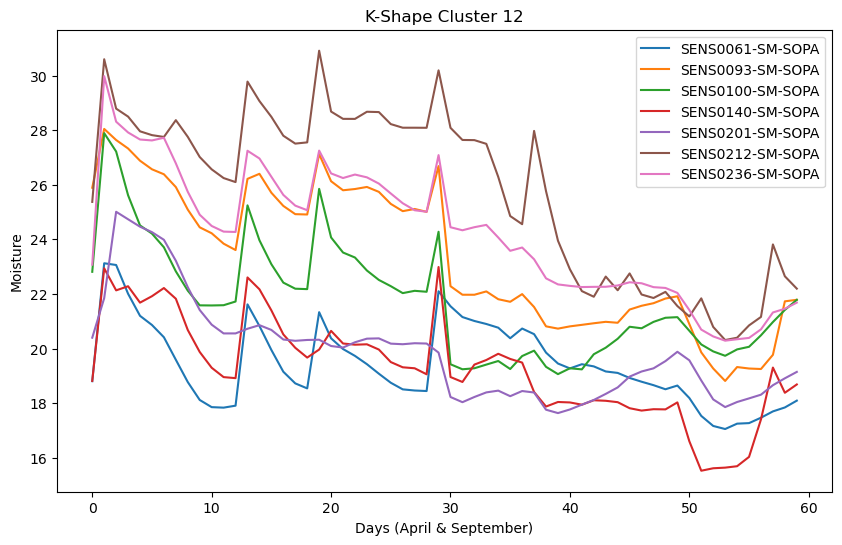

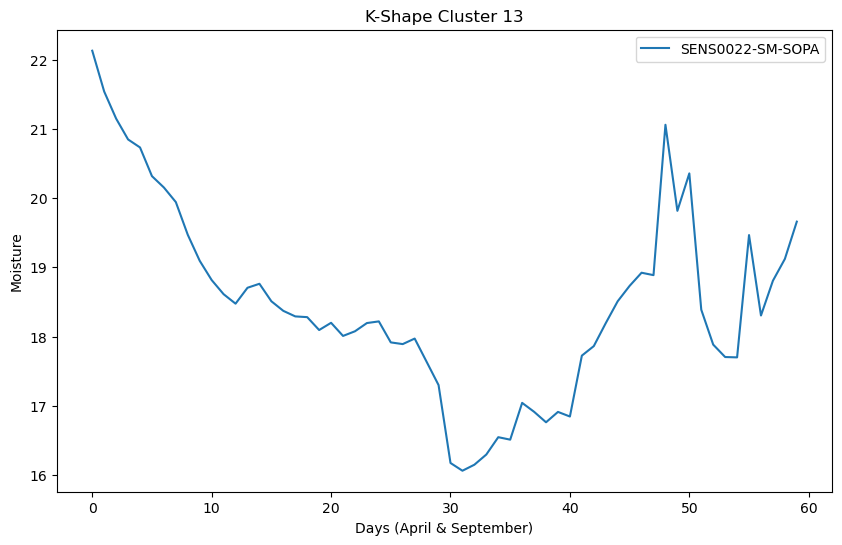

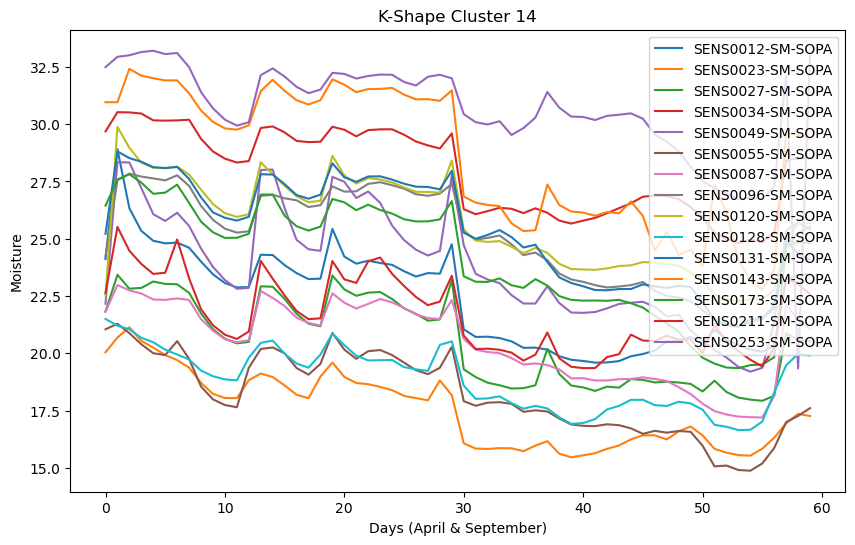

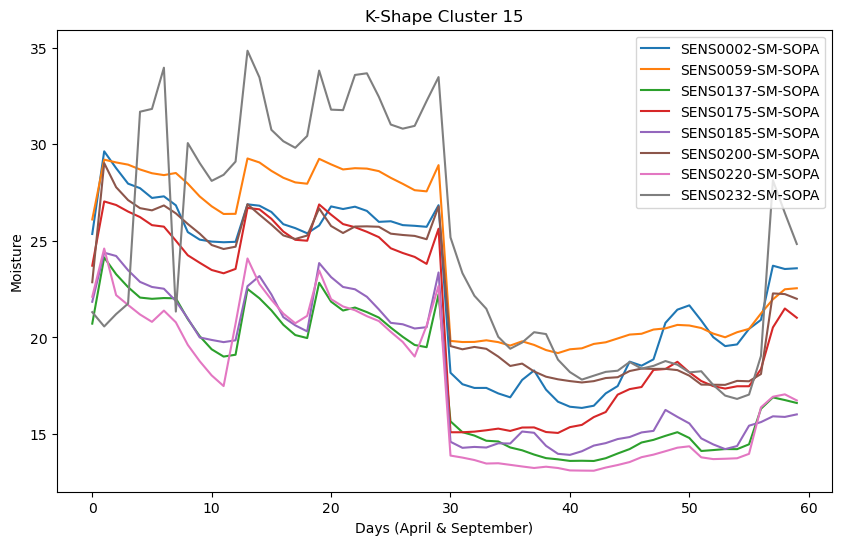

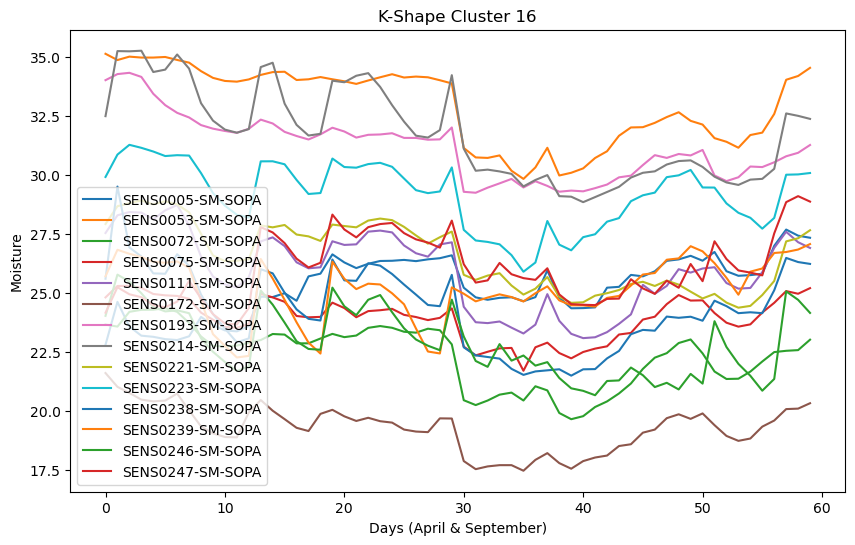

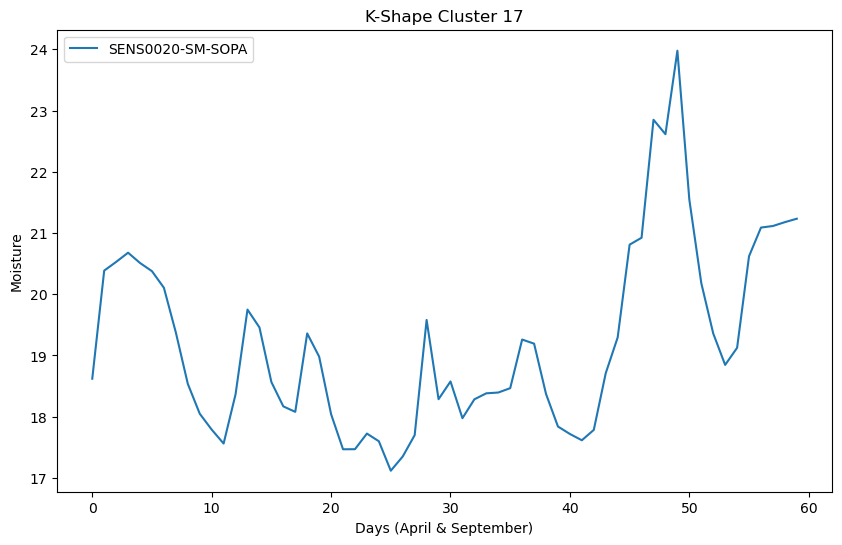

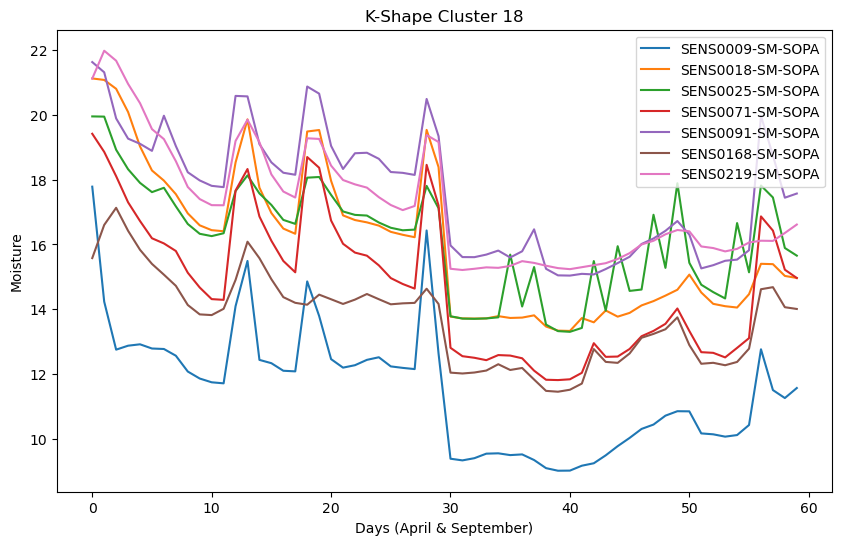

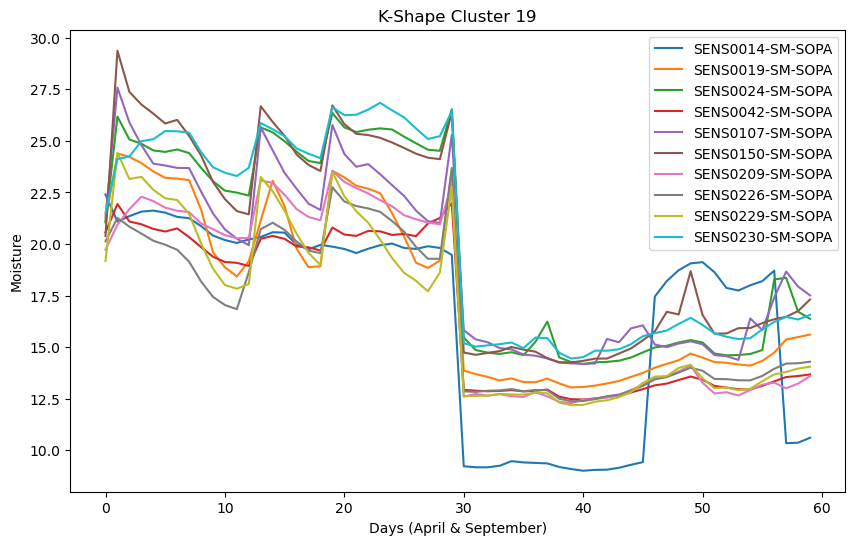

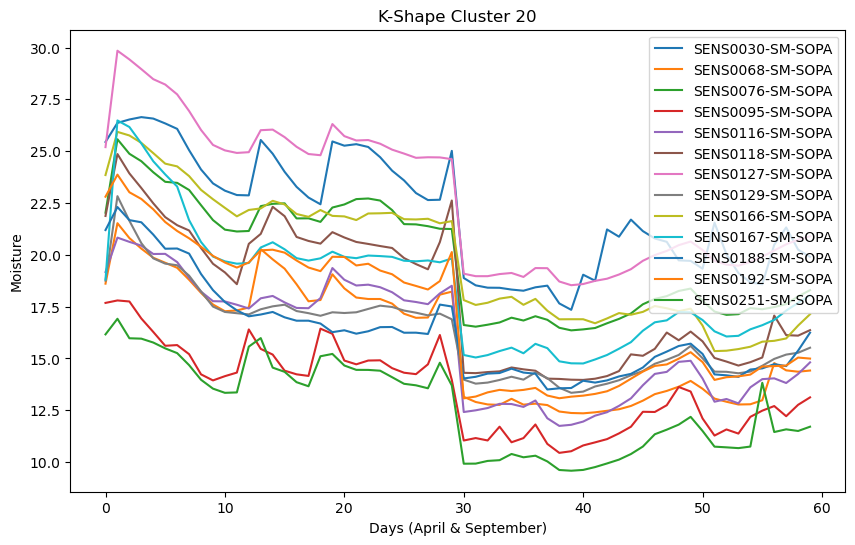

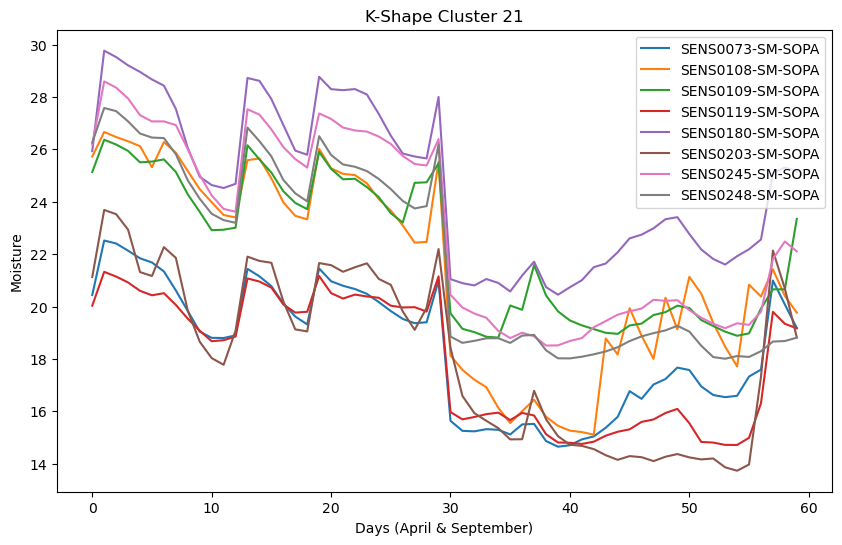

In [316]:


import numpy as np
import pandas as pd
from tslearn.clustering import KShape
import matplotlib.pyplot as plt

# Assuming dfh is your DataFrame containing sensor data

# Step 1: Preprocess the data
# Extract the sensor data
#dfd_imputed = dfd_cleaned.fillna(dfd.mean())
#dfd.reset_index(inplace=True)
#dfd['Unnamed: 0'] = pd.to_datetime(dfd['Unnamed: 0'])

# Now, you can use the 'Unnamed: 0' column as the index
#dfd.set_index('Unnamed: 0', inplace=True)
#dfd = dfd.ffill(axis=0)

#sensor_data = sensor_data.values.T  # Transpose to have sensors as rows and time steps as columns

# Step 2: Apply KShape clustering algorithm
n_clusters = 21  #best silhouette

kshape = KShape(n_clusters=n_clusters, verbose=False, random_state=42)
kshape.fit(sensor_data)
    

# Step 3: Plot each cluster
cluster_labels = kshape.labels_
for cluster_id in range(n_clusters):
    plt.figure(figsize=(10, 6))
    cluster_indices = np.where(cluster_labels == cluster_id)[0]
    for idx in cluster_indices:
        sensor_name = sensor_names[idx]
        plt.plot(sensor_data[idx], label=f'{sensor_name}')
    plt.title(f'K-Shape Cluster {cluster_id + 1}')
    plt.xlabel('Days (April & September)')
    plt.ylabel('Moisture')
    plt.legend()
    plt.show()

In [310]:
cluster_labels = kshape.labels_

cluster_counts = {}
for label in set(cluster_labels):
    cluster_counts[label] = np.sum(cluster_labels == label)

print("Cluster\tNumber of Records")
for cluster, count in cluster_counts.items():
    print(f"{cluster}\t{count}")

Cluster	Number of Records
0	3
1	10
2	2
3	2
4	8
6	2
7	1
8	5
9	5
11	7
12	1
13	15
14	8
15	14
16	1
17	7
18	10
19	13
20	8


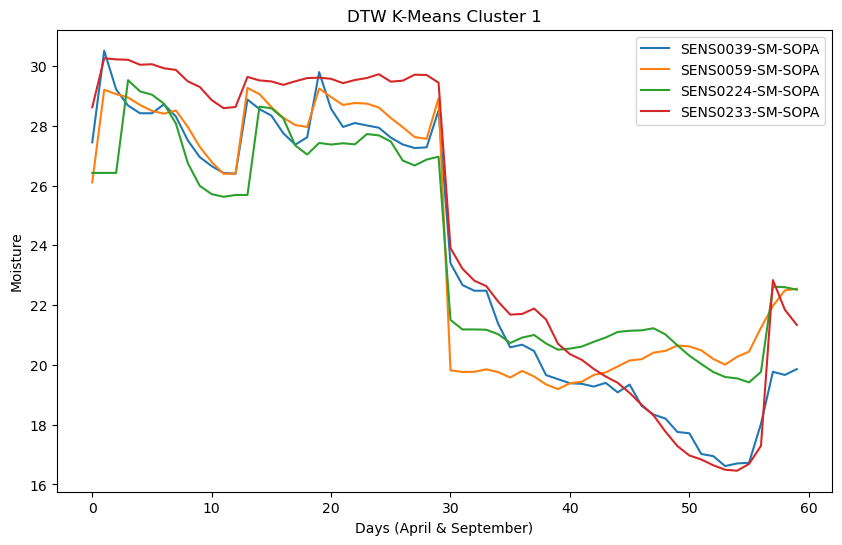

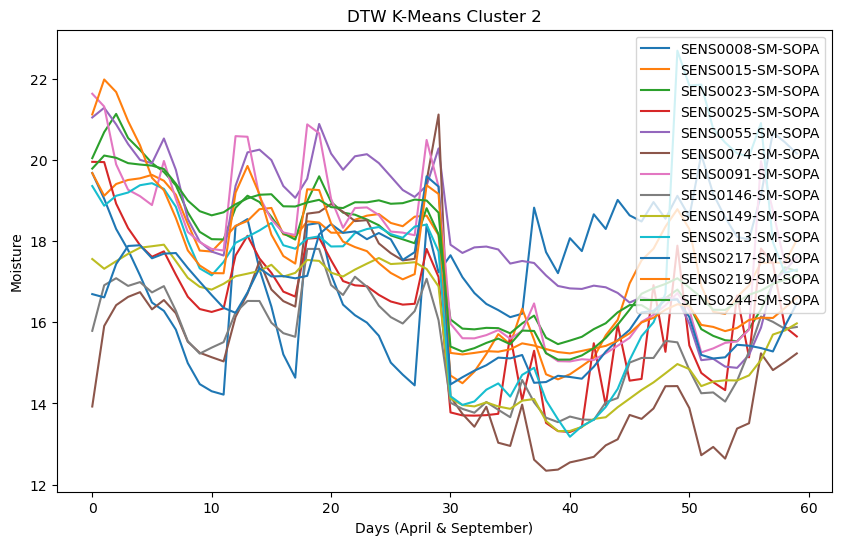

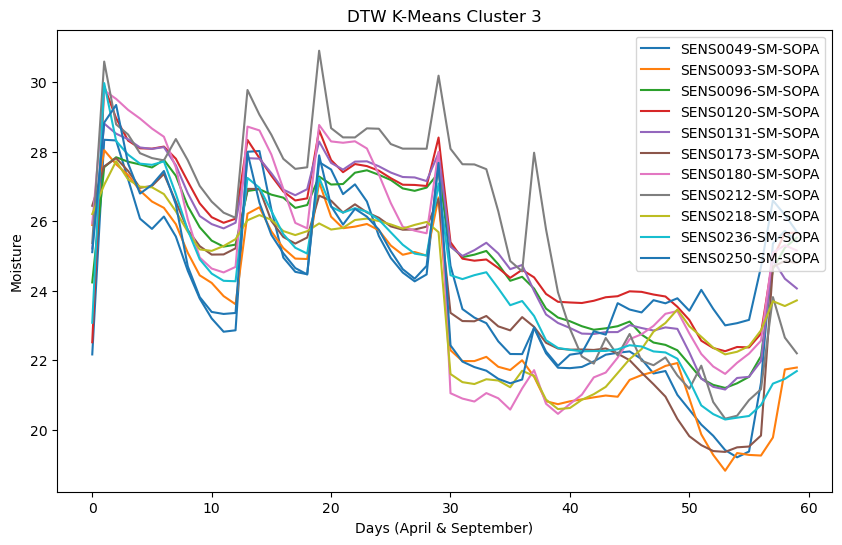

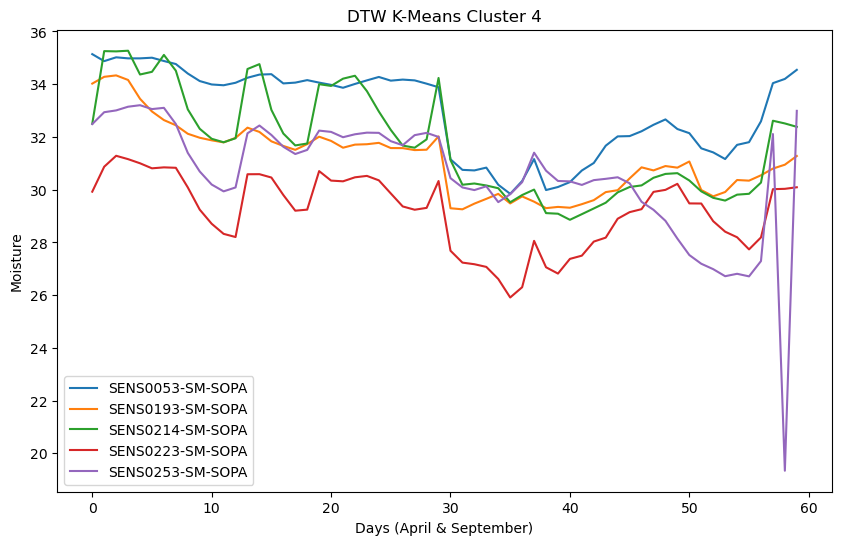

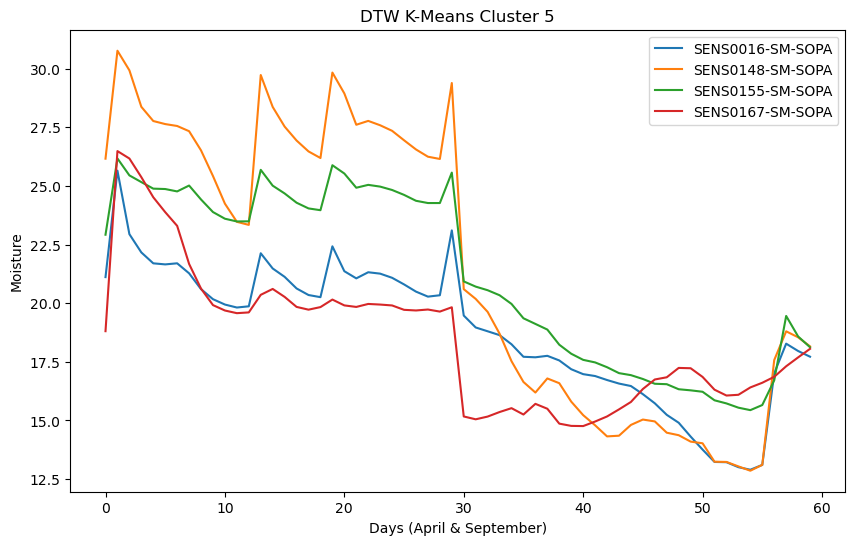

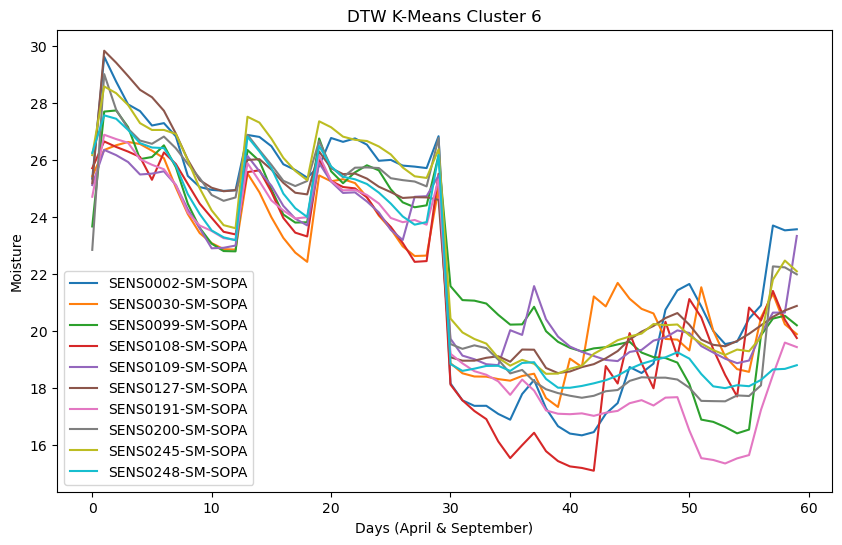

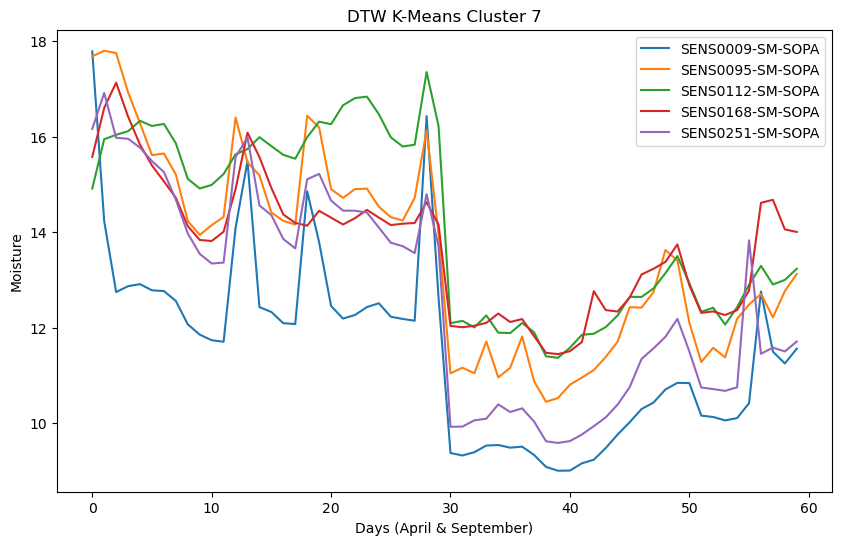

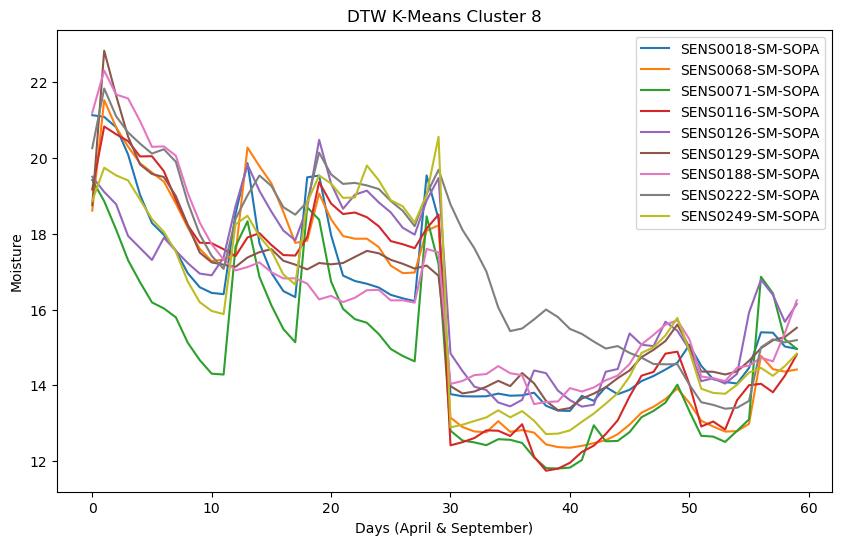

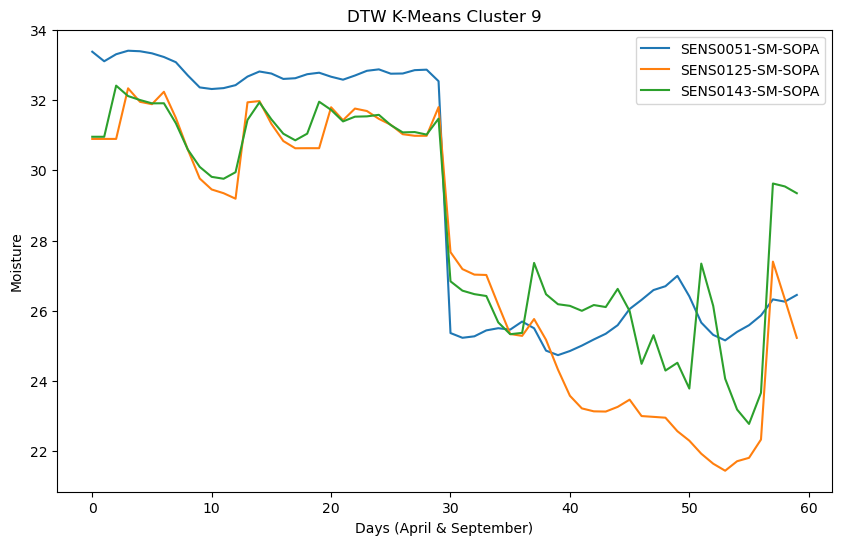

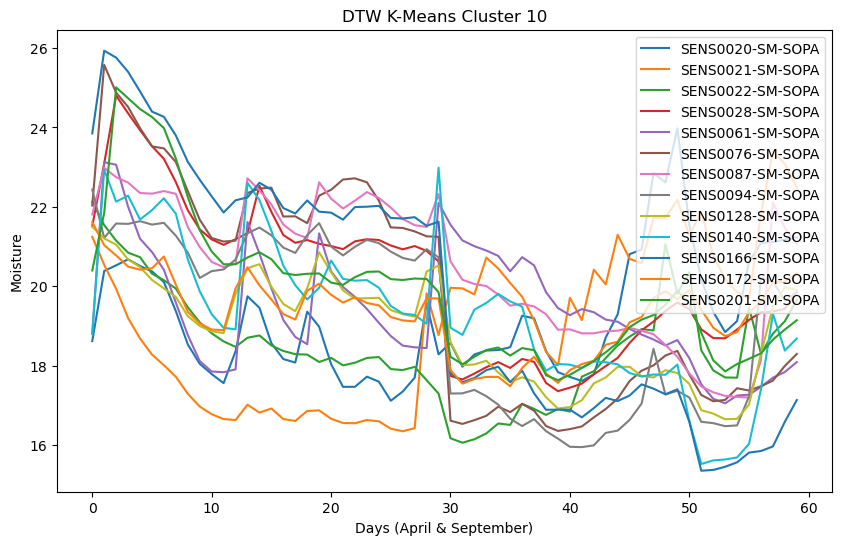

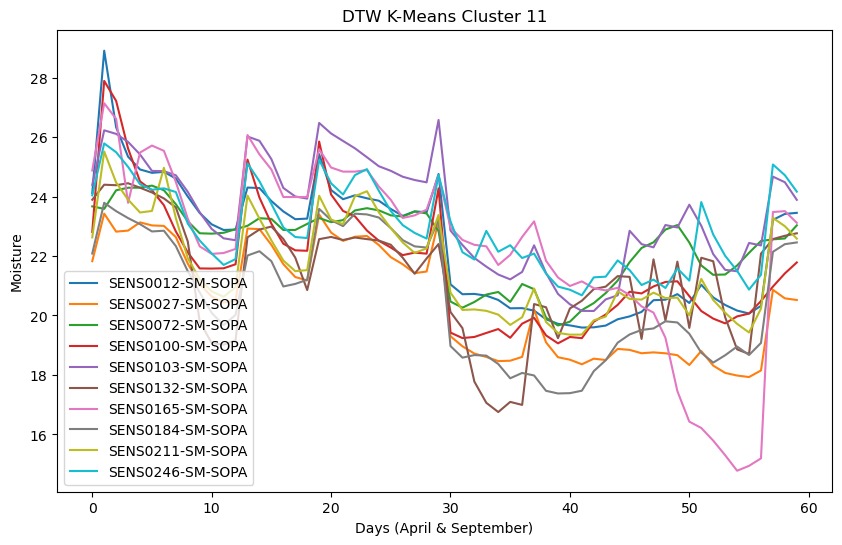

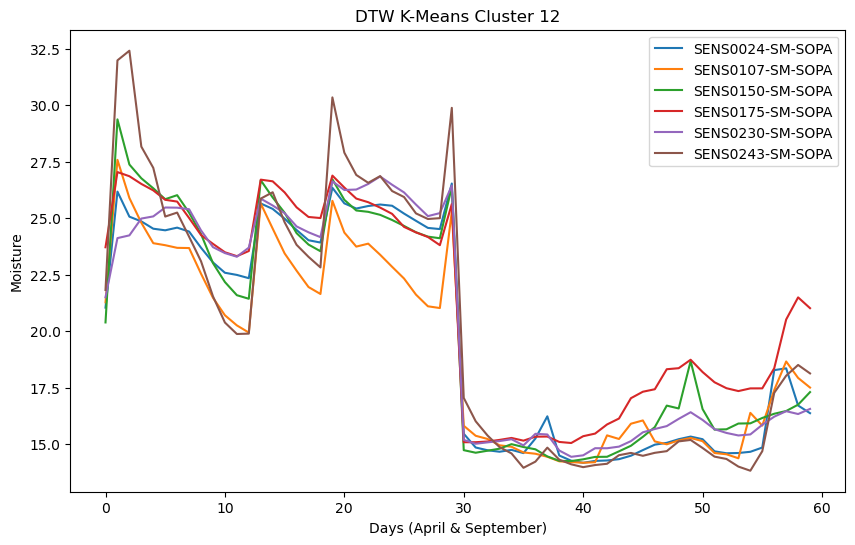

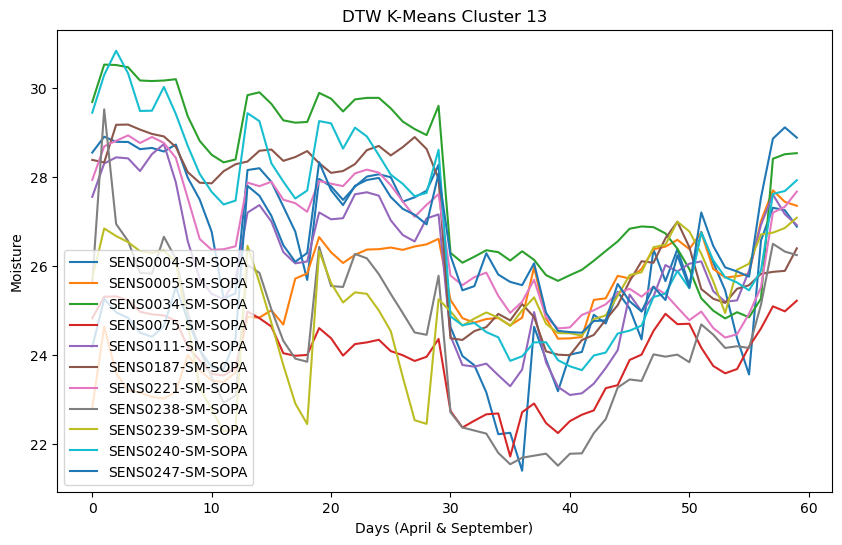

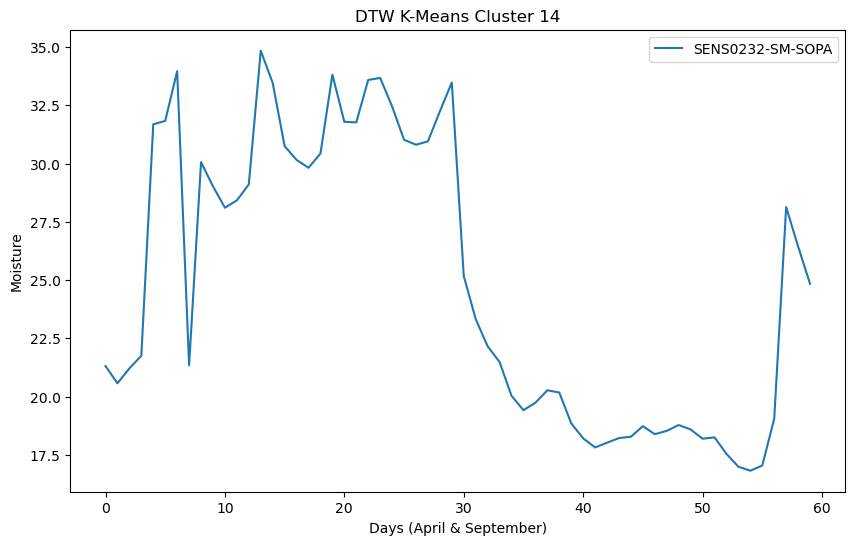

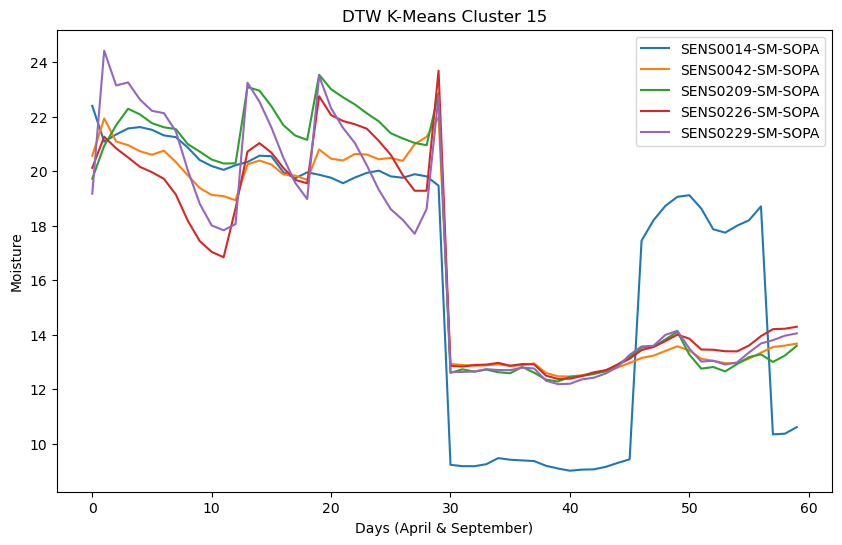

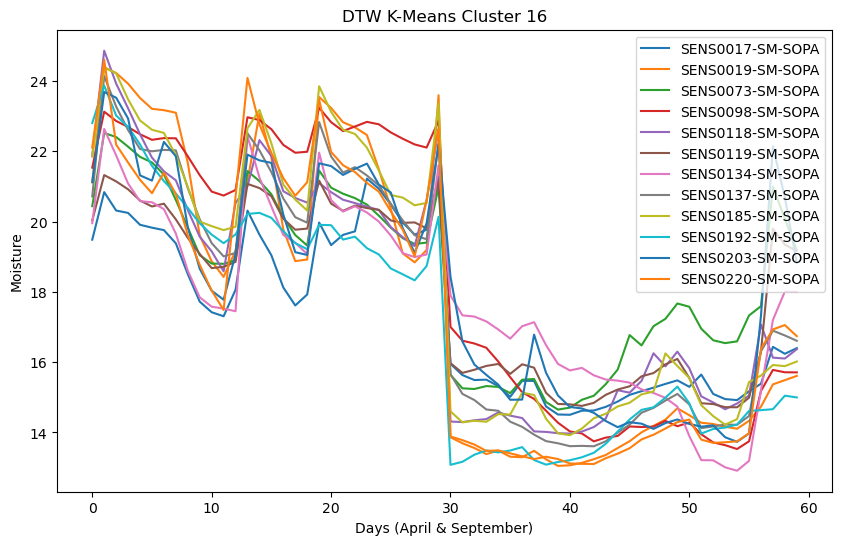

In [317]:
import numpy as np
import pandas as pd
from tslearn.clustering import TimeSeriesKMeans
import matplotlib.pyplot as plt

# Assuming dfd is your DataFrame containing sensor data

# Step 1: Preprocess the data
# Impute missing values with forward fill
#dfd = dfd.ffill(axis=0)

# Transpose to have sensors as rows and time steps as columns
#sensor_data = time_series_data.values.T  # Transpose to have sensors as rows and time steps as columns

# Step 2: Apply DTW clustering algorithm
n_clusters = 16 # best silhouttte
dtw_kmeans = TimeSeriesKMeans(n_clusters=n_clusters, metric="dtw", verbose=False, random_state=42)
dtw_kmeans.fit(sensor_data)

# Step 3: Plot each cluster
cluster_labels = dtw_kmeans.labels_
for cluster_id in range(n_clusters):
    plt.figure(figsize=(10, 6))
    cluster_indices = np.where(cluster_labels == cluster_id)[0]
    for idx in cluster_indices:
        sensor_name = sensor_names[idx]
        plt.plot(sensor_data[idx], label=f'{sensor_name}')
    plt.title(f'DTW K-Means Cluster {cluster_id + 1}')
    plt.xlabel('Days (April & September)')
    plt.ylabel('Moisture')
    plt.legend()
    plt.show()
